## Ch5. 常見深度學習訓練技巧

### VGG 預訓練模型

In [1]:
from torchvision import models # 需引入必要的套件
import torch
import torch.nn as nn

class VGGNet(nn.Module):
    def __init__(self, num_classes=10):	   
        super(VGGNet, self).__init__()
        net = models.vgg16(pretrained=True)   
        net.classifier = nn.Sequential()	
        self.features = net		
        self.classifier = nn.Sequential(    
                nn.Linear(512 * 7 * 7, 512),
                nn.ReLU(True),
                nn.Dropout(),
                nn.Linear(512, 128),
                nn.ReLU(True),
                nn.Dropout(),
                nn.Linear(128, num_classes),
        )
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x


### 二值化範例程式碼

#### 1. 全域二值化

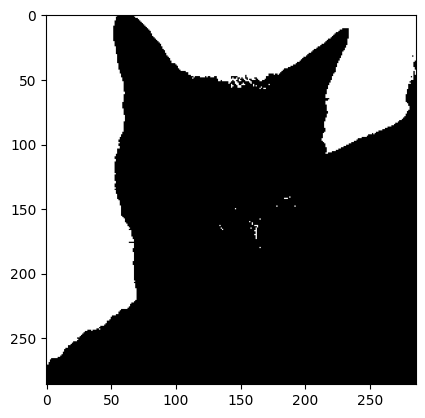

In [2]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('Russian_Blue_143_cat0.jpg', 0)
ret, th1 = cv2.threshold(img, 240, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(th1, cv2.COLOR_BGR2RGB))
plt.show()

#### 2. 自適應二值化

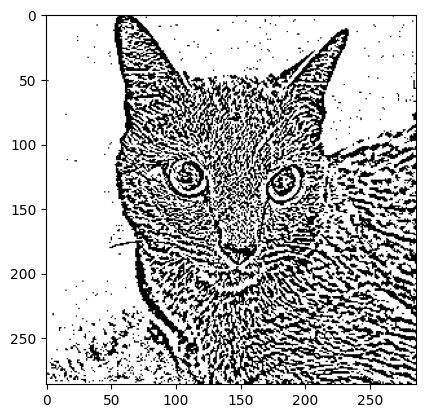

In [3]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('Russian_Blue_143_cat0.jpg', 0)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
plt.imshow(cv2.cvtColor(th3, cv2.COLOR_BGR2RGB))
plt.show()

### 影像旋轉

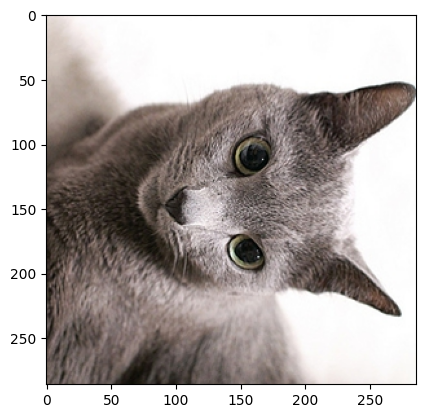

In [6]:
import cv2
img = cv2.imread('Russian_Blue_143_cat0.jpg')
rotate_90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE) 
# cv2.ROTATE_90_CLOCKWISE / cv2.ROTATE_90_COUNTERCLOCKWISE / cv2.ROTATE_180

plt.imshow(cv2.cvtColor(rotate_90, cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
def rotate(img, angle, scale): 
    h,w,d = img.shape
    center = (w//2, h//2)
    
    Matrix = cv2.getRotationMatrix2D(center, angle, scale)
    
    rotate_img = cv2.warpAffine(img, Matrix, (w, h))
    return rotate_img

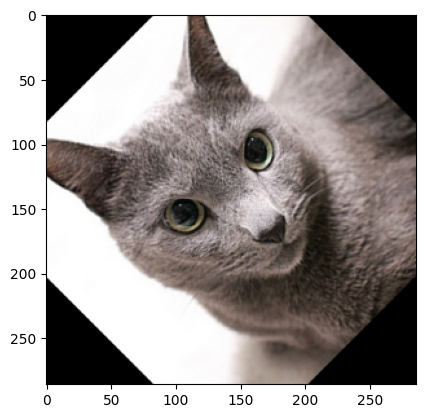

In [8]:
rotate_img = rotate(img, 45, 1.0)
plt.imshow(cv2.cvtColor(rotate_img, cv2.COLOR_BGR2RGB))
plt.show()

### 影像翻轉

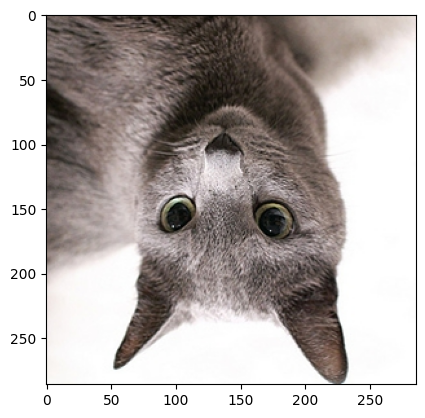

In [9]:
import cv2
img = cv2.imread('Russian_Blue_143_cat0.jpg')
flip_img = cv2.flip(img, -1) # 0:上下垂直翻轉 1:左右水平翻轉 -1:上下左右翻轉
plt.imshow(cv2.cvtColor(flip_img, cv2.COLOR_BGR2RGB))
plt.show()

### 影像縮放

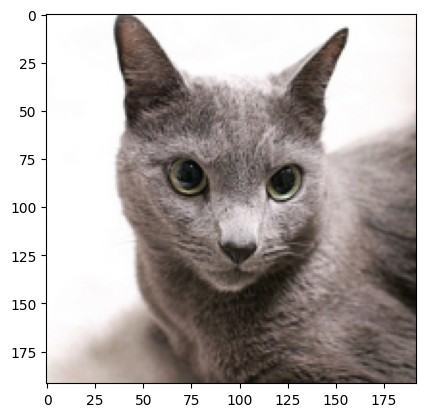

In [10]:
import cv2
img = cv2.imread('Russian_Blue_143_cat0.jpg')
resize_img = cv2.resize(img, (192,192), interpolation=cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(resize_img, cv2.COLOR_BGR2RGB))
plt.show()

### 影像裁減

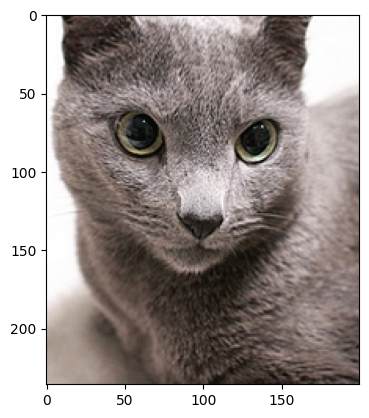

In [11]:
import cv2
img = cv2.imread('Russian_Blue_143_cat0.jpg')
x = 50
y = 50
w = 200
h = 250
crop_img = img[y:y+h,x:x+w]
plt.imshow(cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB))
plt.show()